In [1]:
#This Notebook's purpose is too learn Sentiment Analysis and implement it in meaningful manner.
#Reference was multiple YT video, Articles and Research Paper.
#Dataset-->https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews/data

In [2]:
#Firstly we import NLTK
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [4]:
#Reading Reviews.csv and understanding the Data
df = pd.read_csv("/content/Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.shape

(568454, 10)

In [6]:
#using only 500 reviews to train the text first, to save time.
df = df.head(500)

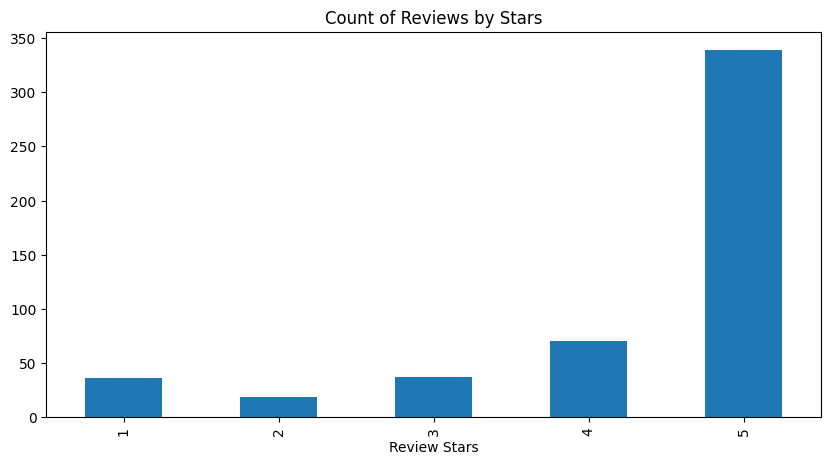

In [7]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [8]:
print(df.isnull().values.any())

False


In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [10]:
#Lets Start using NLTK
results = {}
for i, row in tqdm(df.iterrows(), total=len(df)): #just fucking memorize it
      text = row['Text']
      myid = row['Id']
      results[myid] = SentimentIntensityAnalyzer().polarity_scores(text) #polarity scores are just fany way of saying emotional score

  0%|          | 0/500 [00:00<?, ?it/s]

In [11]:
vaderres0 = pd.DataFrame(results).T
vaderres = vaderres0.reset_index().rename(columns={'index': 'Id'}) #puts the
vaderres.head()

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468


In [12]:
vaderres0.head()
#The differnce between vaderres0 and vaderres is just that vaderres was adjusted to have original df inder and values with exception of neg,neu,pos.

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


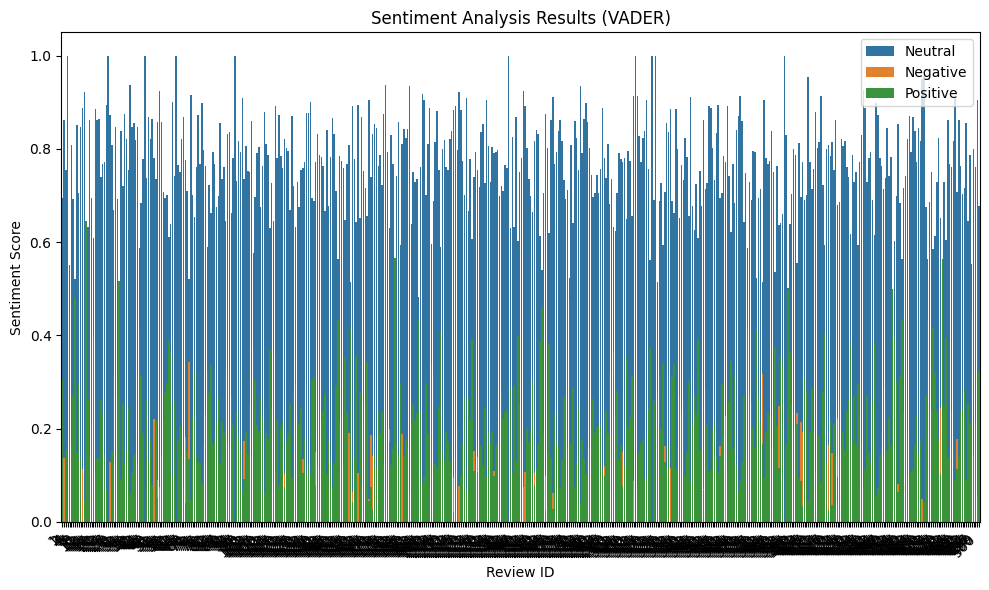

In [13]:
# Create the triple barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Id', y='neu', data=vaderres, label='Neutral')
sns.barplot(x='Id', y='neg', data=vaderres, label='Negative')
sns.barplot(x='Id', y='pos', data=vaderres, label='Positive')

plt.xlabel("Review ID")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Analysis Results (VADER)")
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

#Lets Work With pretained model *Roberta*

In [14]:
from transformers import AutoTokenizer #used to tokenize the string text
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax #https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.softmax.html

In [15]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment" #model we used is roberta from huggingface.
tokenizer = AutoTokenizer.from_pretrained(Model) #https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest
model = AutoModelForSequenceClassification.from_pretrained(Model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [16]:
sia = SentimentIntensityAnalyzer()

 17%|█▋        | 83/500 [00:46<01:20,  5.16it/s]

Broke for id 83


 37%|███▋      | 186/500 [01:25<02:23,  2.19it/s]

Broke for id 187


100%|██████████| 500/500 [03:38<00:00,  2.29it/s]


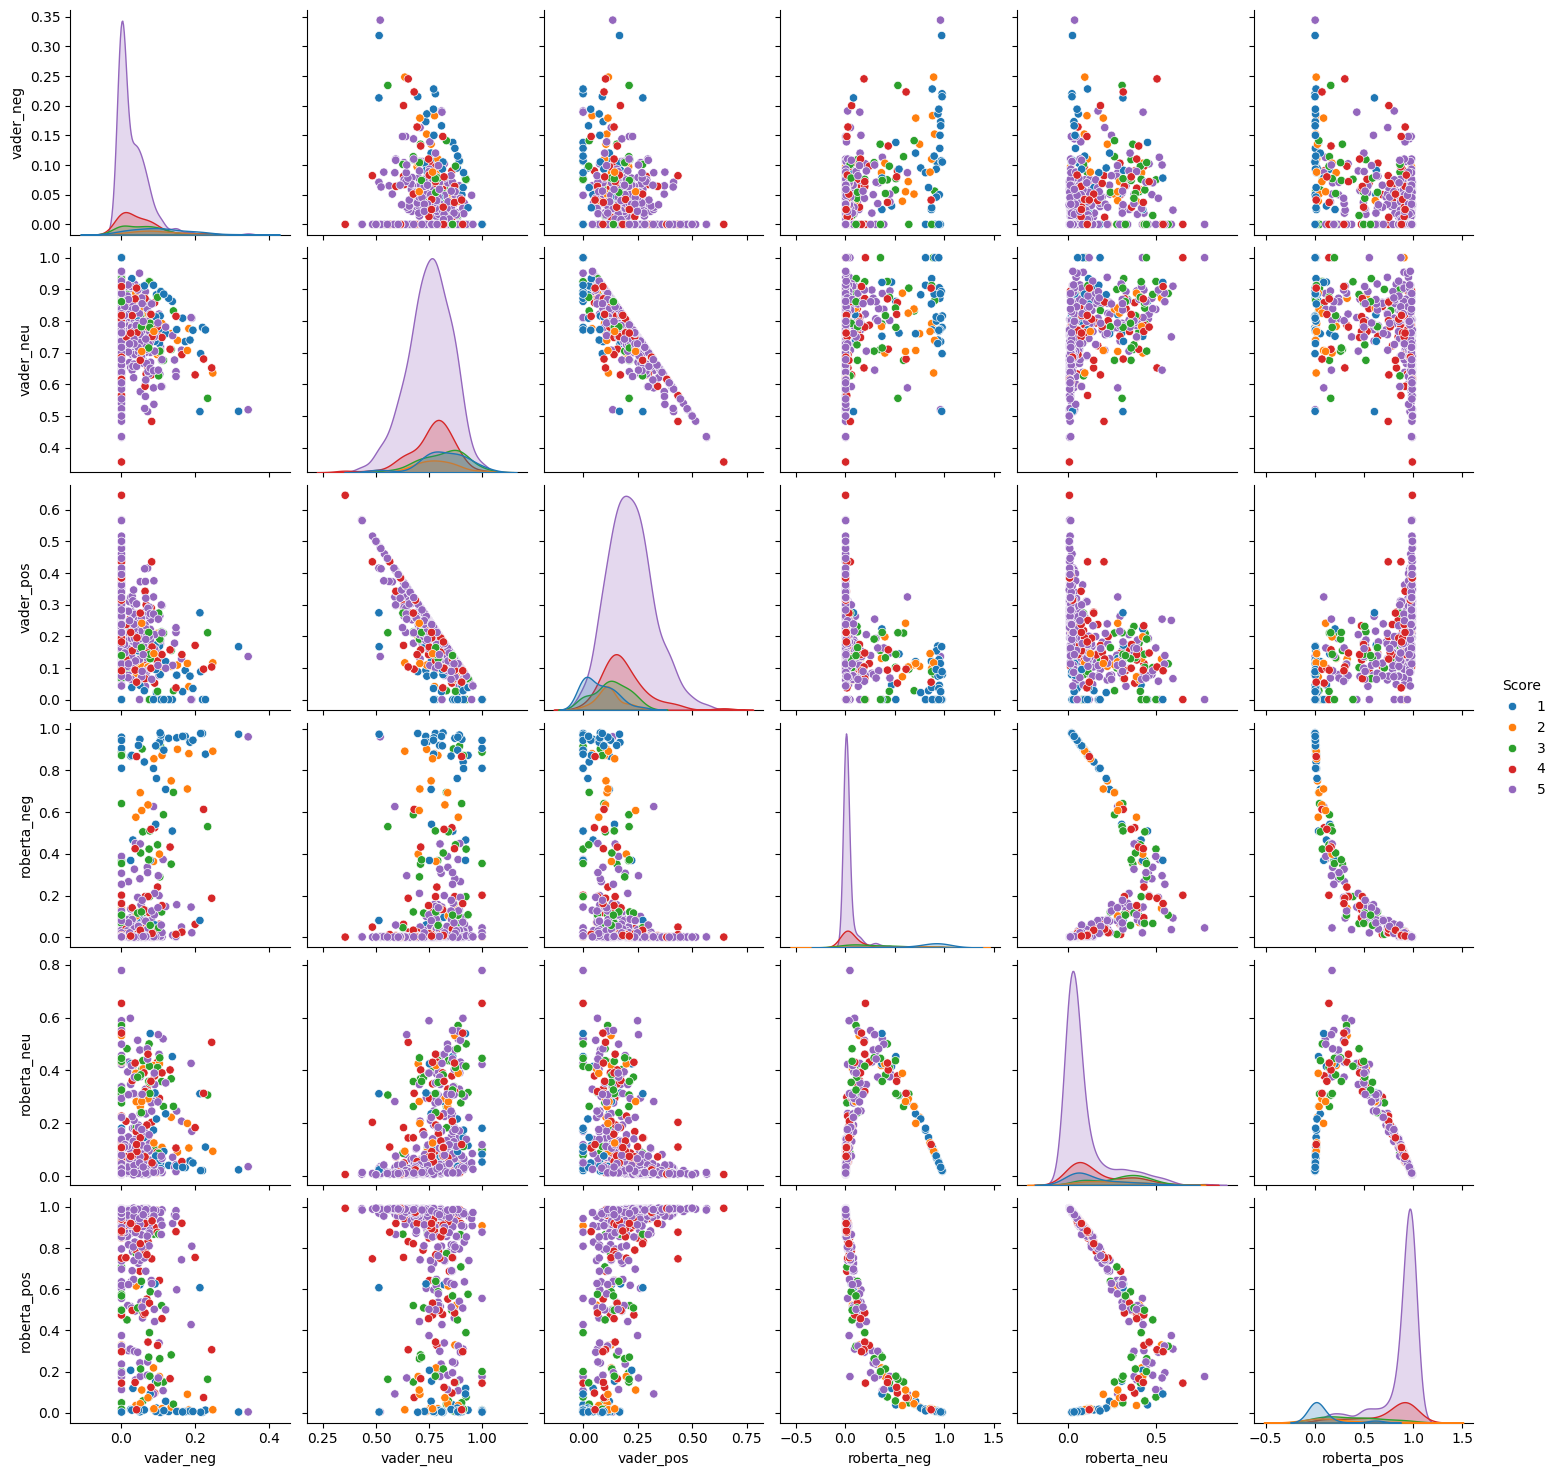

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

# Define the polarity_scores_roberta function
def polarity_scores_roberta(text):
    """
    This function uses the RoBERTa model to calculate sentiment scores.

    Args:
        text (str): The input text for sentiment analysis.

    Returns:
        dict: A dictionary containing sentiment scores (neg, neu, pos).
    """
    encoded_input = tokenizer.encode_plus(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    # Assuming the model outputs scores in the order: negative, neutral, positive
    return {'neg': scores[0], 'neu': scores[1], 'pos': scores[2]}

# Assuming you have your DataFrame 'df'

sia = SentimentIntensityAnalyzer()
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        roberta_result = polarity_scores_roberta(text)  # Call the defined function

        # Check if roberta_result is a dictionary and contains 'neg' key
        if isinstance(roberta_result, dict) and 'neg' in roberta_result:
            roberta_result_rename = {}
            for key, value in roberta_result.items():
                roberta_result_rename[f"roberta_{key}"] = value #Adding roberta_ prefix to the keys for better organization
            both = {**vader_result_rename, **roberta_result_rename} #Merging dictionaries using the renamed roberta result to add roberta_ prefix to the keys
            res[myid] = both
        else:
            print(f"Warning: roberta_result for id {myid} is not in the expected format or missing 'neg' key: {roberta_result}")
            # Handle the case where roberta_result is not as expected -
            # you might want to skip this row, fill with default values, or investigate further

    except RuntimeError:
        print(f'Broke for id {myid}')


results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')


sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [22]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [24]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [25]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]


'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [26]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [27]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]